In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import math

from matplotlib import cm, gridspec
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline
df = pd.read_csv('data/Family Income and Expenditure.csv')

import re

if "Total Food Expenditure" in list(df):    
    df = df.drop("Total Food Expenditure", 1)
reg = re.compile('.*(([Ee]xpenditure)|([Ee]xpenses))$')
expenditure_types = [var for var in list(df) if re.match(reg, var)]
df["TotalExpenditure"] = np.sum(df[expenditure_types],1)

reg_number = re.compile('Number.*')
reg_house = re.compile('House .*')
reg_type = re.compile('Type .*')

remove = [var for var in list(df) if re.match(reg_number, var) 
                                  or re.match(reg_house, var) 
                                  or re.match(reg_type, var)]  + expenditure_types

for var in remove:
    if var in list(df):
        df = df.drop(var, 1)

df = df.rename(index=str, columns={var:(re.sub('[\s+]', '', var))for var in list(df)})

In [5]:
df = df.reindex(np.random.permutation(df.index))
df['Bias'] = 1

X = df["HouseholdHeadAge"]
#y = df["TotalExpenditure"]
y = df["HouseholdHeadAge"]**2 + 10 + np.random.normal(scale=300, size=df.shape[0])

In [6]:
X[:10]

1164     46
1044     24
622      31
31563    65
19478    44
19935    33
26257    76
17303    60
4809     36
30531    56
Name: HouseholdHeadAge, dtype: int64

In [7]:
y[:10]

1164     1664.061228
1044      575.075585
622       775.778160
31563    4150.371669
19478    2355.842794
19935     906.448681
26257    5484.396152
17303    4165.730796
4809     1592.881692
30531    2602.939492
Name: HouseholdHeadAge, dtype: float64

In [8]:
model = Sequential()
model.add(Dense(units=5, activation='relu', input_dim=1))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mse',
#              optimizer=optimizers.SGD(lr=0.0001),
              optimizer='rmsprop',
              metrics=['mse'])

In [9]:
model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50
41544/41544 [==============================] - 1s 21us/step - loss: 9389862.9847 - mean_squared_error: 9389862.9847
Epoch 2/50
41544/41544 [==============================] - 1s 17us/step - loss: 3556138.4063 - mean_squared_error: 3556138.4063
Epoch 3/50
41544/41544 [==============================] - 1s 18us/step - loss: 647744.6248 - mean_squared_error: 647744.6248
Epoch 4/50
41544/41544 [==============================] - 1s 18us/step - loss: 637798.7131 - mean_squared_error: 637798.7131
Epoch 5/50
41544/41544 [==============================] - 1s 18us/step - loss: 628889.5387 - mean_squared_error: 628889.5387
Epoch 6/50
41544/41544 [==============================] - 1s 18us/step - loss: 620122.6600 - mean_squared_error: 620122.6600
Epoch 7/50
41544/41544 [==============================] - 1s 18us/step - loss: 611144.8998 - mean_squared_error: 611144.8998
Epoch 8/50
41544/41544 [==============================] - 1s 17us/step - loss: 602181.4155 - mean_squared_error: 602181.4

In [10]:
predictions = model.predict(X)

In [11]:
predictions[:10]

array([[2253.1091  ],
       [ -25.444696],
       [ 636.62714 ],
       [4300.653   ],
       [2037.578   ],
       [ 852.15796 ],
       [5486.0728  ],
       [3761.8254  ],
       [1175.4543  ],
       [3330.764   ]], dtype=float32)

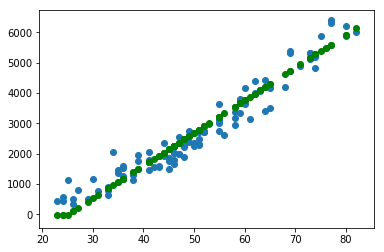

In [12]:
plt.scatter(X[:100],y[:100])
plt.scatter(X[:100], predictions[:100], color='green')